Kaggle 2015年举办的Otto Group Product Classification Challenge竞赛数据

第一名模型
https://kaggle2.blob.core.windows.net/forum-message-attachments/79598/2514/FINAL_ARCHITECTURE.pn

In [1]:
#导入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss


c:\users\ydwu\appdata\local\programs\python\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#读取数据
data=pd.read_csv('./data/Otto_train.csv')
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


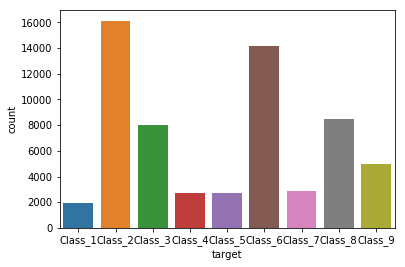

In [3]:
sns.countplot(data.target)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [5]:
data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [6]:
data.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    0
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    0
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    0
feat_23    0
feat_24    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
          ..
feat_65    0
feat_66    0
feat_67    0
feat_68    0
feat_69    0
feat_70    0
feat_71    0
feat_72    0
feat_73    0
feat_74    0
feat_75    0
feat_76    0
feat_77    0
feat_78    0
feat_79    0
feat_80    0
feat_81    0
feat_82    0
feat_83    0
feat_84    0
feat_85    0
feat_86    0
feat_87    0
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

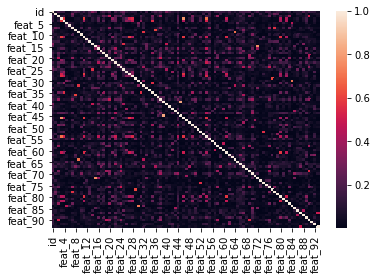

In [7]:
data_corr=data.corr().abs()
sns.heatmap(data_corr)

In [3]:
#特征编码
Y_data=data['target']
Y_data=Y_data.map(lambda s:s[6:])
Y_data=Y_data.map(lambda s:int(s)-1)
X_data=data.drop(['id','target'],axis=1)
X_data=np.array(X_data)
print(X_data)
X_data.shape

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  3 10  0]
 [ 0  0  0 ...  0  2  0]]


(61878, 93)

In [4]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_data=ss.fit_transform(X_data)
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2)
# X_train.shape

c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.cross_validation import cross_val_score
loss=cross_val_score(lr,X_data,Y_data,cv=5,scoring='neg_log_loss')
print('logloss each step',-loss)


c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


logloss each step [0.67686698 0.68182095 0.6683812  0.66628679 0.6743945 ]


In [13]:
penaltys=['l1','l2']
Cs=[0.001,0.01,0.1,1,10,100]
params=dict(penalty=penaltys,C=Cs)
grid=GridSearchCV(lr,params,cv=5,scoring='neg_log_loss')
grid.fit(X_data,Y_data)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [14]:
grid.cv_results_

c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(

{'mean_fit_time': array([ 2.21396823,  6.53783545,  6.1129724 , 11.46167407, 16.78643198,
        18.94330754, 29.77844162, 23.98602953, 38.08830881, 26.68648028,
        39.51177726, 27.31872978]),
 'mean_score_time': array([0.01301036, 0.01418905, 0.0153841 , 0.01530461, 0.01498151,
        0.01497512, 0.01250134, 0.00625482, 0.01250653, 0.0093821 ,
        0.01563663, 0.01563268]),
 'mean_test_score': array([-1.17705975, -1.02651724, -0.77504533, -0.76020957, -0.68195   ,
        -0.68690563, -0.6723824 , -0.67355026, -0.67188458, -0.67184408,
        -0.67190294, -0.67183336]),
 'mean_train_score': array([-1.17597536, -1.02389825, -0.7709263 , -0.75433198, -0.67254718,
        -0.67728089, -0.66043173, -0.66191649, -0.65923009, -0.65940431,
        -0.65912957, -0.65909371]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100],
              mask=[False, False, False, False, False, False, False, False,
                    F

In [15]:
print(grid.best_score_)
print(grid.best_params_)

-0.6718333564052541
{'C': 100, 'penalty': 'l2'}


In [17]:
train_means=grid.cv_results_['mean_train_score']
train_stds=grid.cv_results_['std_train_score']
test_means=grid.cv_results_['mean_test_score']
test_stds=grid.cv_results_['std_test_score']
print(train_means)

[-1.17597536 -1.02389825 -0.7709263  -0.75433198 -0.67254718 -0.67728089
 -0.66043173 -0.66191649 -0.65923009 -0.65940431 -0.65912957 -0.65909371]


c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\ydwu\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


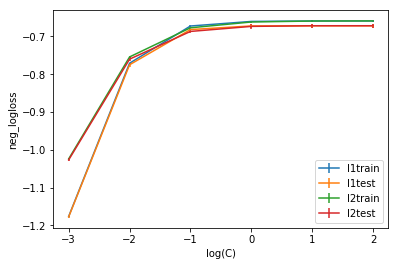

In [29]:
n_Cs=len(Cs)
n_penaltys=len(penaltys)
train_score=np.array(train_means).reshape(n_Cs,n_penaltys)
train_std=np.array(train_stds).reshape(n_Cs,n_penaltys)
test_score=np.array(test_means).reshape(n_Cs,n_penaltys)
test_std=np.array(test_stds).reshape(n_Cs,n_penaltys)
x_axis=np.log10(Cs)
for i ,value in enumerate(penaltys):
    plt.errorbar(x_axis,train_score[:,i],yerr=train_std[:,i],label=penaltys[i]+'train')
    plt.errorbar(x_axis,test_score[:,i],yerr=test_std[:,i],label=penaltys[i]+'test')
plt.legend()
plt.xlabel('log(C)')
plt.ylabel('neg_logloss')
plt.show()

L1正则

In [7]:
from  sklearn.linear_model import LogisticRegressionCV
Cs=[1,10,100,1000]
lr_l1=LogisticRegressionCV(Cs=Cs,penalty='l1',cv=5,scoring='neg_log_loss',solver='liblinear',multi_class='ovr')
lr_l1.fit(X_data,Y_data)

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [8]:
lr_l1.scores_

{0: array([[-0.08352357, -0.08351859, -0.08351929, -0.08351933],
        [-0.08855237, -0.08870852, -0.08872613, -0.08872808],
        [-0.08310834, -0.08322743, -0.08324093, -0.08324243],
        [-0.08218094, -0.08218973, -0.08219015, -0.08219017],
        [-0.08079015, -0.08076729, -0.08076558, -0.08076541]]),
 1: array([[-0.31682801, -0.31682221, -0.316823  , -0.31682379],
        [-0.32032753, -0.32039098, -0.32039816, -0.32039855],
        [-0.31523858, -0.31526713, -0.31527008, -0.3152695 ],
        [-0.31668862, -0.31669422, -0.31669202, -0.31669236],
        [-0.31923593, -0.31928647, -0.31929286, -0.31929207]]),
 2: array([[-0.26140504, -0.26141918, -0.261421  , -0.26142103],
        [-0.26185401, -0.26187979, -0.26188368, -0.26188366],
        [-0.26768144, -0.26772839, -0.26772902, -0.26772922],
        [-0.26380682, -0.26382867, -0.2638311 , -0.26383156],
        [-0.2632647 , -0.2632879 , -0.26329142, -0.26329147]]),
 3: array([[-0.13062809, -0.13080905, -0.13082936, -0.1

In [9]:
lr_l1.coef_

array([[-4.48007708e-02, -1.82105115e-01, -3.33943963e-01,
        -1.32154468e-01,  6.85644389e-02,  5.58906534e-02,
         8.73000576e-02,  6.00905873e-02, -1.02847646e+00,
         2.67956875e-02, -1.40901958e+00,  1.41477474e-02,
        -2.80662363e-01, -1.10579448e+00, -1.67704859e+00,
        -7.18263693e-02,  3.14197234e-01,  1.31891575e-01,
        -6.49715225e-01,  1.16809869e-01, -5.45439333e-03,
         5.97469944e-02,  1.18196851e-01,  3.36824084e-01,
        -7.92686202e-01, -1.30464418e-01, -1.27786790e-01,
         7.43287566e-02, -2.85531594e-01,  2.22176770e-01,
        -4.11301029e-01,  8.97202675e-02, -2.90523189e-01,
        -1.04226962e+00, -5.83894120e-01, -1.71005754e-01,
         2.03484556e-01, -1.02889771e-01, -1.44843082e-01,
        -1.26938406e+00, -2.59961808e-01, -4.48983566e-01,
        -1.75096023e+00,  1.44901055e-01, -3.11400169e-01,
        -2.38811421e-01, -2.03724973e-01,  3.65400908e-02,
         4.30925668e-02, -5.61944735e-01,  2.54884333e-0

In [43]:
n_c=len(Cs)
n_classes=9
scores=np.zeros((n_classes,n_c))

for j in range (n_classes):
    scores[j][:]=np.mean(lr_l1.scores_[j],axis=0)
scores


array([[-0.08363107, -0.08368231, -0.08368842, -0.08368908],
       [-0.31766373, -0.3176922 , -0.31769522, -0.31769525],
       [-0.2636024 , -0.26362879, -0.26363124, -0.26363139],
       [-0.1282278 , -0.12830853, -0.12831914, -0.12832021],
       [-0.01488543, -0.01514538, -0.01526064, -0.01527801],
       [-0.11057126, -0.11062783, -0.11063363, -0.1106349 ],
       [-0.10392298, -0.1039715 , -0.10397722, -0.1039778 ],
       [-0.10416171, -0.10419347, -0.10419699, -0.10419797],
       [-0.09030398, -0.09036147, -0.09036863, -0.09036897]])

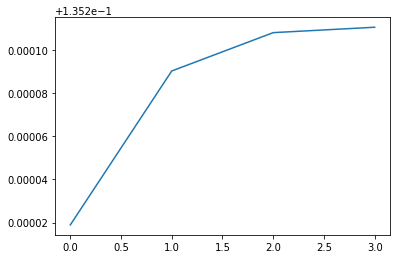

In [18]:
mse_mean=-np.mean(scores,axis=0)
plt.plot(np.log10(Cs),mse_mean.reshape(n_c,1))

In [42]:
# n_c=len(Cs)
# n_classes=9
# scores=np.zeros((n_classes,n_c))
# a=np.mean(lr_l1.scores_[8],axis=0)

# a

array([-0.09030398, -0.09036147, -0.09036863, -0.09036897])

In [41]:
# b=([[-0.08352357, -0.08351859, -0.08351929, -0.08351933],
#         [-0.08855237, -0.08870852, -0.08872613, -0.08872808],
#         [-0.08310834, -0.08322743, -0.08324093, -0.08324243],
#         [-0.08218094, -0.08218973, -0.08219015, -0.08219017],
#         [-0.08079015, -0.08076729, -0.08076558, -0.08076541]])
# a=np.mean(b)
# a

-0.0836727215

L2正则

In [49]:
from  sklearn.linear_model import LogisticRegressionCV
Cs=[1,10,100,1000]
lr_l2=LogisticRegressionCV(Cs=Cs,penalty='l2',cv=5,scoring='neg_log_loss',solver='liblinear',multi_class='ovr')
lr_l2.fit(X_data,Y_data)

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [50]:
n_c=len(Cs)
n_classes=9
scores=np.zeros((n_classes,n_c))

for j in range (n_classes):
    scores[j][:]=np.mean(lr_l2.scores_[j],axis=0)
scores


array([[-0.08360139, -0.08367588, -0.08368826, -0.0836895 ],
       [-0.31767156, -0.31769403, -0.31769672, -0.31769706],
       [-0.26361368, -0.26362997, -0.2636325 , -0.2636329 ],
       [-0.12824515, -0.12830737, -0.12831968, -0.12832096],
       [-0.01552731, -0.01494204, -0.0152101 , -0.01529672],
       [-0.11060644, -0.11063288, -0.11063582, -0.11063609],
       [-0.10393413, -0.10397254, -0.10397751, -0.103978  ],
       [-0.10415016, -0.10419368, -0.10419885, -0.1041994 ],
       [-0.09029129, -0.09035862, -0.09036898, -0.09037006]])

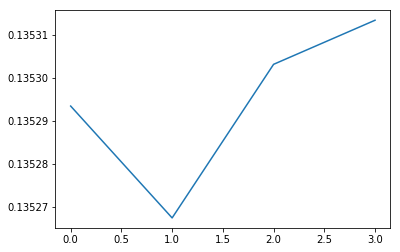

In [51]:
mse_mean=-np.mean(scores,axis=0)
plt.plot(np.log10(Cs),mse_mean.reshape(n_c,1))